<a href="https://colab.research.google.com/github/AlejandroVillazonG/Tareas_INF398/blob/main/T1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>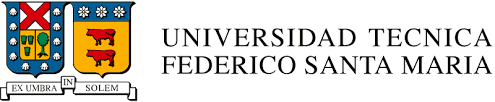</center>



<hr style="height:2px;border:none"/>
<h1 align='center'> INF398 INTRODUCCIÓN AL APRENDIZAJE AUTOMÁTICO - 2023-1 </h1>

<H3 align='center'> Tarea 1  </H3>
<hr style="height:2px;border:none"/>

<H3 align='center'> Joaquín Aguirre - Alejandro Villazón  </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Manipulaciones en pandas y numpy, imputación de datos y preprocesamientos
* Feature Engineering
* Regresión
* Clasificación
* Regularización
* SVM

Importe las librerías necesarias para cargar explorar el conjunto de datos.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, f1_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_classif

from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC

import warnings

# Ignorar las advertencias
warnings.filterwarnings("ignore")

Lo primero es obtener los datos, para esto elegimos la opción de descargarlos mediante la [API](https://github.com/Kaggle/kaggle-api#kaggle-api) de Kaggle. Siguiendo este tutorial [Kaggle + Colab](https://galhever.medium.com/how-to-import-data-from-kaggle-to-google-colab-8160caa11e2)

Localizar y subir la api-key de kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"joaqunaguirre","key":"b18c6c8891fe1ad491d669612425946d"}'}

Otorgar permisos de lectura y escritura al archivo kaggle.json

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# 1. Demanda de bicicletas compartidas en Seúl.

Regresión lineal para la predicción de la demanda de bicicletas compartidas en Seúl

La regresión lineal es un modelo matemático que pertenece al aprendizaje supervisado, el cual intenta aplicar relaciones que predigan el resultado de un evento basándose en los datos de variables independientes. Llamaremos a este resultado: variable objetivo o _target_, y como es un modelo de regresión lineal la variable objetivo es una variable continua.

<center><img src=https://t4.ftcdn.net/jpg/02/32/47/13/360_F_232471334_vfDHKHeRHtwkn0zvd8SM98THwQeYDn8y.jpg></center>

Los sistemas de bicicletas compartidas son un medio para alquilar bicicletas en el que el proceso de afiliación, alquiler y devolución se automatiza a través de una red de _quioscos o puntos de estacionamiento_ repartidos por toda la ciudad. Gracias a estos sistemas, los usuarios pueden alquilar una bicicleta en un lugar y devolverla en otro cuando lo necesiten.

En esta pregunta se le proporcionan datos de alquiler de la cantidad de bicicletas arrendadas por hora durante dos años según variables climáticas y laborales. 

Usted tiene separar el dataset en un conjunto de entrenamiento y en un conjunto de prueba, y el objetivo de esta pregunta será: **predecir el número total de bicicletas alquiladas en el conjunto de pruebas**.

La base de datos y toda la información asociada a esta se puede encontrar en el siguiente link: https://www.kaggle.com/datasets/saurabhshahane/seoul-bike-sharing-demand-prediction.

## 1.1 Manipulación y exploración del conjunto de datos

Descargar el dataset

In [4]:
!kaggle datasets download -d saurabhshahane/seoul-bike-sharing-demand-prediction

  0% 0.00/126k [00:00<?, ?B/s]
100% 126k/126k [00:00<00:00, 68.0MB/s]


Descomprimir

In [5]:
!unzip seoul-bike-sharing-demand-prediction.zip

Archive:  seoul-bike-sharing-demand-prediction.zip
  inflating: SeoulBikeData.csv       


### 1.1.1 Exploración del conjunto de datos




In [6]:
data = pd.read_csv('SeoulBikeData.csv',encoding= 'unicode_escape')

In [7]:
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


Explore el conjunto de datos y responda  brevemente las siguiente preguntas:

In [8]:
def datainfo():
    temp_ps = pd.DataFrame(index=data.columns)
    temp_ps['DataType'] = data.dtypes
    temp_ps["Non-null_Values"] = data.count()
    temp_ps['Unique_Values'] = data.nunique()
    temp_ps['NaN_Values'] = data.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(data))*100 
    return temp_ps

datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
Date,object,8760,365,0,0.0
Rented Bike Count,int64,8760,2166,0,0.0
Hour,int64,8760,24,0,0.0
Temperature(°C),float64,8760,546,0,0.0
Humidity(%),int64,8760,90,0,0.0
Wind speed (m/s),float64,8760,65,0,0.0
Visibility (10m),int64,8760,1789,0,0.0
Dew point temperature(°C),float64,8760,556,0,0.0
Solar Radiation (MJ/m2),float64,8760,345,0,0.0
Rainfall(mm),float64,8760,61,0,0.0


Notamos que hay 14 variables contando la variable target, entre estas tenemos variables del tipo númerico y categórico. Tenemos variables sobre la fecha, hora, condiciones climáticas, días laborables/festivos y el número de bicicletas alquiladas.

> a) ¿Cuáles variables poseen valores numéricos y cuáles poseen valores categóricos?

Luego de hacer un análisis descriptivo básico de las columnas, notamos que las variables numéricas serían 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)' y 'Snowfall (cm)'. Y las variables categóricas serían: 'Date', 'Seasons', 'Holiday' y 'Functioning Day'.

> b) ¿Qué aspecto tienen en común las variables _Date_ y _Season_?

Son del mismo tipo: categóricas. Son variables temporales, que ordenan de forma cronologica las mediciones, pero _Date_ proporciona información precisa sobre la fecha en que se registraron los datos, en cambio, la variable _Season_ se enfoca en estaciones del año, lo que permitirá analizar las variaciones estacionales en la demanda de bicicletas compartidas.

> c) Revise si faltan valores en los conjuntos de datos de prueba y de entrenamiento.

Basados en la exploración anterior, no hay datos faltantes.


### 1.1.2 Exploración de Features

> a) Revise detalladamente las variables: 'Date', 'Holiday', 'Seasons' y 'Rented Bike Count' del conjunto de datos cuente y grafique su histograma.

A continuación, se presentan los histogramas para las variables 'Date', 'Holiday', 'Seasons' y 'Rented Bike Count'.




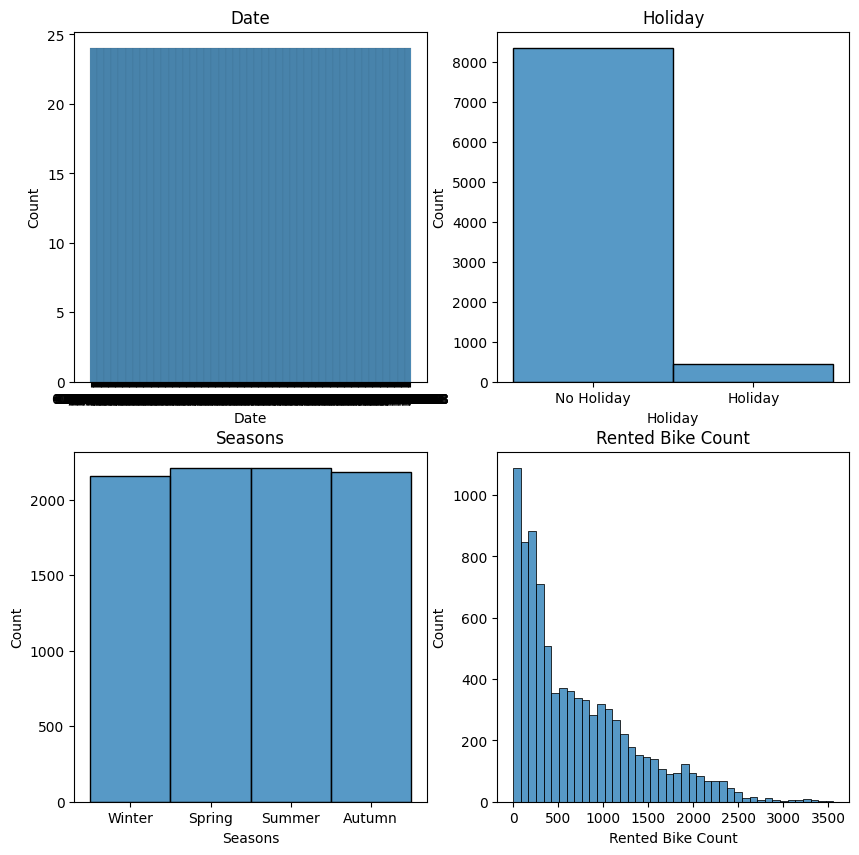

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for i,col in enumerate(['Date', 'Holiday', 'Seasons', 'Rented Bike Count']):
  sns.histplot(data[col], ax = axes[i//2, i%2])
  axes[i//2, i%2].set_title(col)

De los gráficos podemos comentar lo siguiente:

*   Para la variable 'Date', tenemos la información completa, es decir, 24 valores por cada día, uno por cada hora.
*   Para la variable 'Holiday', notamos que tenemos más datos de días que no son feriado, la desproporción es evidente.
*   Para 'Seasons' todos sus posibles valores están razonablemente balanceados, la leve diferencia se puede deber a que los meses que componen cada estación tengan distinta duración.
*   Para 'Rented Bike Count' notamos que hay un gran peak entre 0 y 500 bicicletas rentadas, la masa restante se distribuye entre 500 y 2500, el resto es despreciable en comparación al total que podemos interpretar como días muy buenos para el negocio. 


Una vez analizado lo anterior responda las siguientes preguntas:

> b) ¿La gente arrienda más bicicletas en vacaciones o en días de trabajo?

Para responder a esta pregunta, no podemos basarnos en la información del inciso anterior, es por esto que realizamos un nuevo gráfico que nos entrega el arriendo promedio de bicicletas según el tipo de día.  

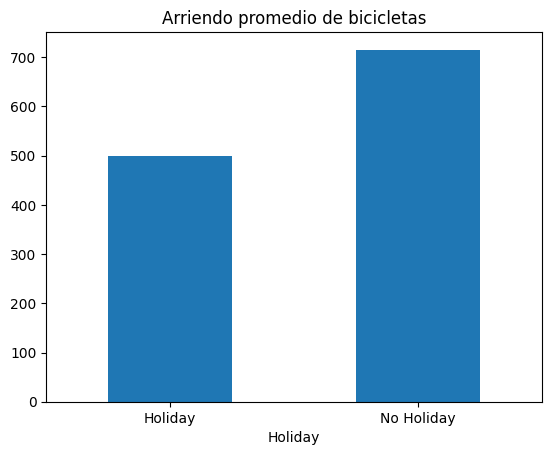

In [10]:
data_aux = data[['Rented Bike Count','Holiday']].groupby('Holiday').mean()['Rented Bike Count']
data_aux.plot(kind = 'bar')
plt.title('Arriendo promedio de bicicletas')
plt.xticks(rotation='horizontal')
plt.show()

Basados en el gráfico anterior, podemos decir que en promedio se arriendan más bicicletas en días de trabajo.


> c) ¿Se arriendan más bicicletas los fines de semana o durante la semana?

 Para responder a esta pregunta crearemos una variable auxiliar que nos dirá si el día es fin de semana o no. Luego, graficaremos el promedio de arriendo de bicicletas según si es fin de semana o no.

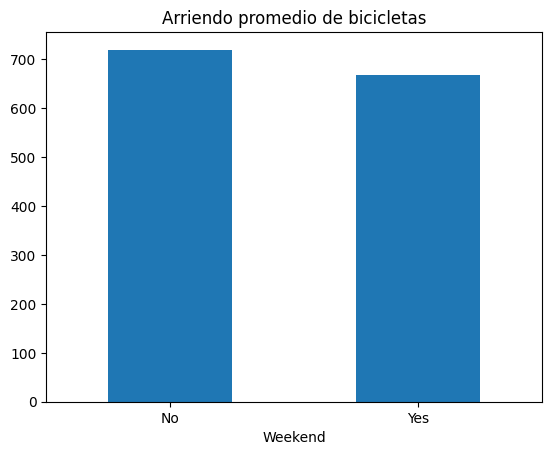

In [11]:
# Agregamos variable auxiliar que serán eliminadas posteriormente
data['Day of Week'] = (pd.to_datetime(data['Date'], format = "%d/%m/%Y")).dt.strftime('%A')
data['Weekend'] = 'No'
data.loc[data['Day of Week'].isin(['Saturday', 'Sunday']), 'Weekend'] = 'Yes'

data_aux = data[['Rented Bike Count','Weekend']].groupby('Weekend').mean()['Rented Bike Count']
data_aux.plot(kind = 'bar')
plt.title('Arriendo promedio de bicicletas')
plt.xticks(rotation='horizontal')
plt.show()

data.drop(['Weekend'], axis = 1, inplace = True)

Dado gráfico anterior, tenemos que en promedio se arriendan más bicicletas los días de semana, pero cabe destacar que la diferencia no es alta.


> d) ¿De qué forma afecta el clima al arriendo de bicicletas?


Para analizar la relación entre el clima y el arriendo de bicicletas, haremos los gráficos de dispersión entre las variables climatológicas y nuestra variable target, esto para ver si exiten ciertos patrones o tendencias.

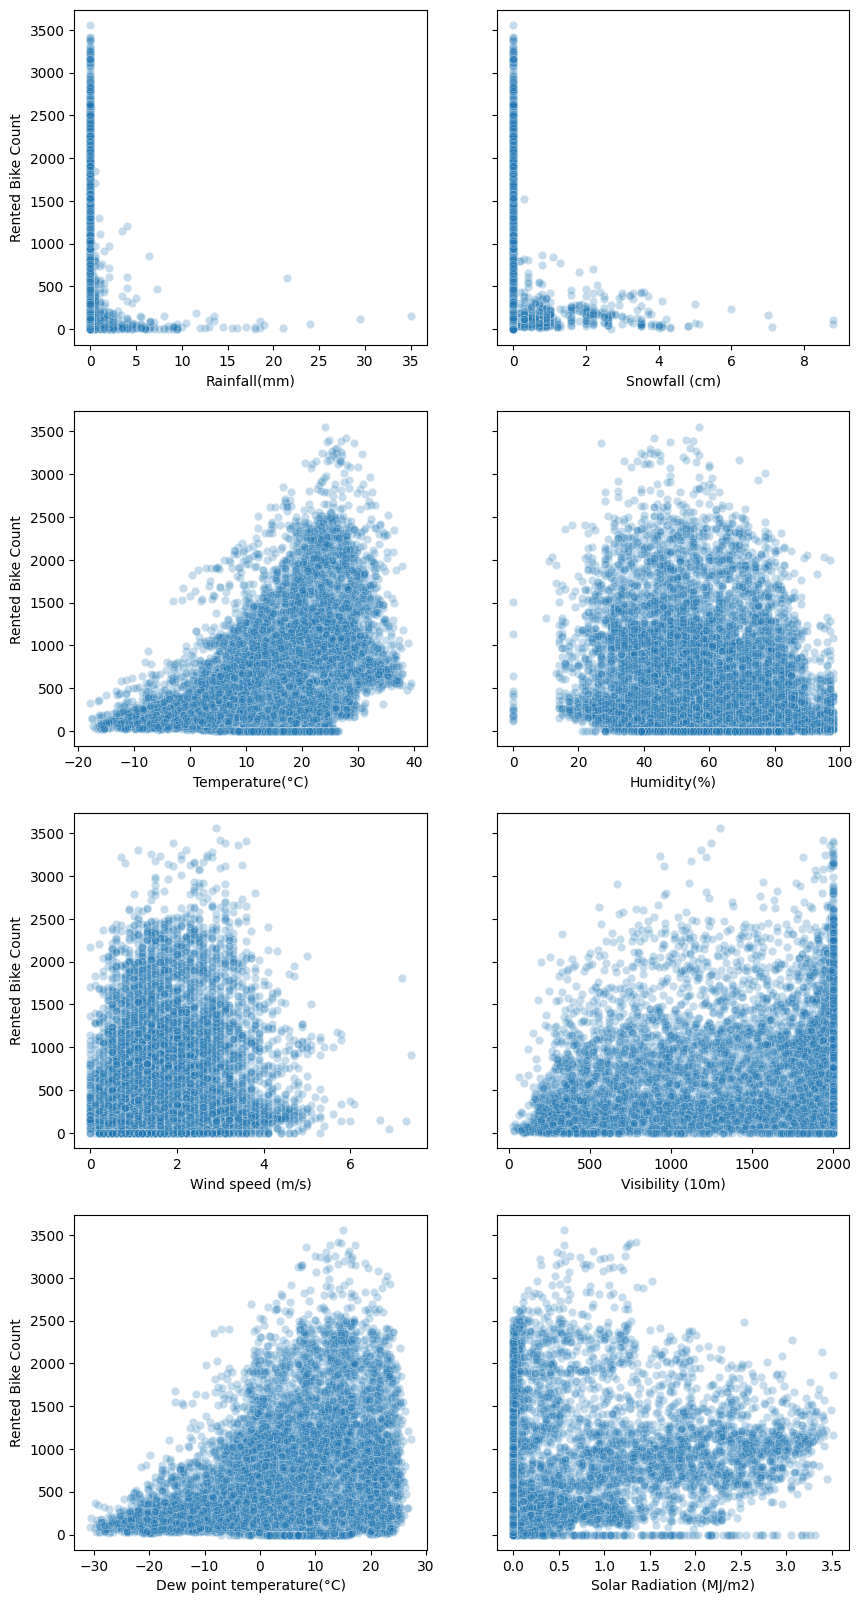

In [12]:
fig, axes = plt.subplots(4, 2, sharey=True, figsize=(10, 20))

col_clima = ['Rainfall(mm)', 'Snowfall (cm)', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)','Solar Radiation (MJ/m2)']

for i,variable in enumerate(col_clima):
  sns.scatterplot(x = data[variable], 
                  y = data['Rented Bike Count'],
                  alpha = 0.25,
                  ax = axes[i//2,i%2]);

De los gráficos anteriores, podemos concluir que, cuando estamos en presencia de fuertes lluvias o fuertes nevazones la demanda de bicicletas se ve fuertemente afectada de manera negativa. 

Para la variable temperatura, notamos que si está por debajo de los 0°C tiende a haber una baja en la demanda de arriendo de bicicletas, cuando estamos sobre 0°C no se ve una clara dependencia. Este análisis es similar para el punto de rocío. 

Para el resto de variables por simple inspección no es fácil notar una relación o dependencia con nuestra variable target.

> e) Grafique el promedio de bicicletas arrendadas por estación ('Seasons').

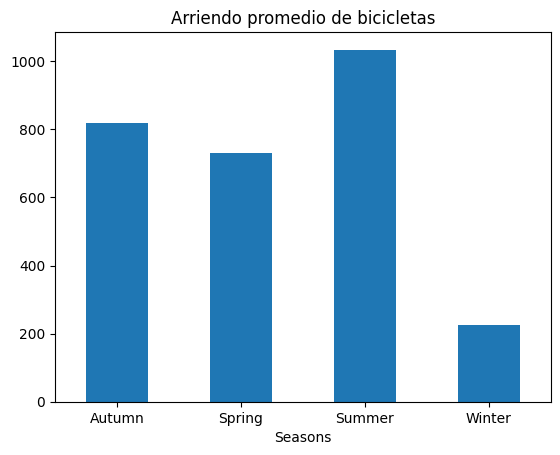

In [13]:
data_aux = data[['Seasons', 'Rented Bike Count']].groupby('Seasons').mean()['Rented Bike Count']
data_aux.plot(kind = 'bar')
plt.title('Arriendo promedio de bicicletas')
plt.xticks(rotation='horizontal')
plt.show()

En el gráfico anterior, se calculó para cada estación del año, el número de bicicletas arrendadas en promedio. Podemos observar que en verano se arriendan más bicicletas y en invierno se arriendan menos en promedio. Además, notamos que esto complementa lo visto en la pregunta anterior, pues un clima más frío de invierno con lluvia y nieve afecta al arriendo de bicicletas de forma negativa.


Responda las siguientes preguntas:

> f) ¿Cuáles son las estaciones en las que más se arriendan bicicletas?

Dado el gráfico, las estaciones en las que más se arriendan bicicletas en promedio son: verano, otoño y primavera, en ese orden.  


> g) Transforme la fecha en variables numéricas, es decir, si _Date_ es 01/12/2017, entonces obtenga _Año_=2017, _mes_=12, _día_=1. Agreguelas al dataframe.

El siguiente código realiza lo pedido:

In [14]:
data[['dayofweek', 'month', 'year']] = data['Date'].str.split('/', expand = True).astype(int)

data.drop('Date', axis=1, inplace=True)

> h) Grafique y analice de forma general la correlación entre las variables **numéricas**. 

A continuación se presenta el gráfico pedido:

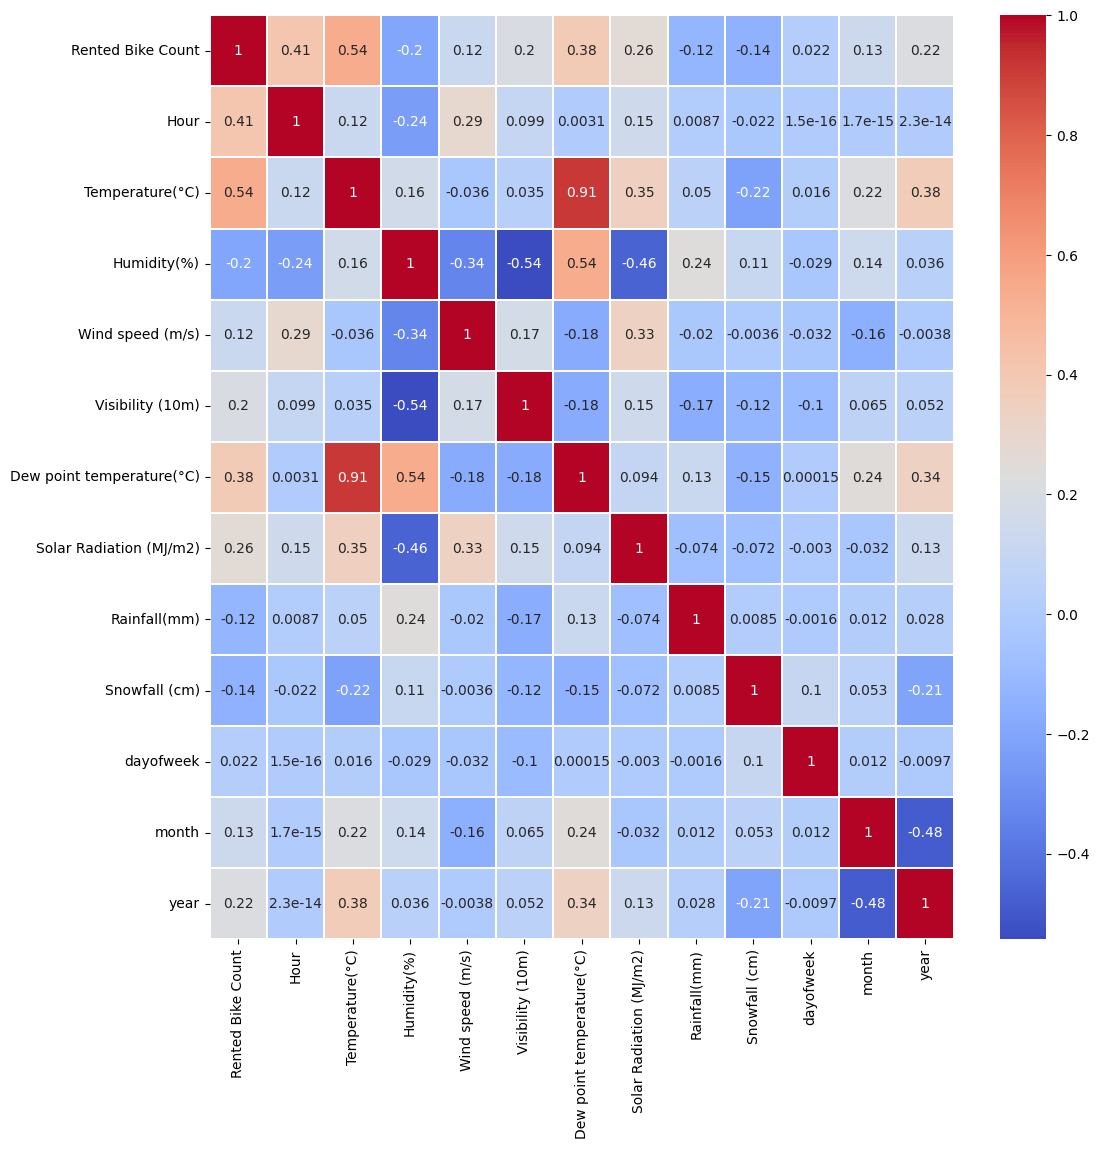

In [15]:
data_corr= data.select_dtypes(include='number').corr()       
plt.figure(figsize=(12,12))

sns.heatmap(data_corr, cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white');

> i) Escriba sus conclusiones sobre los resultados encontrados en la correlación en la pregunta h)

En general se ve una baja correlación lineal entre las variables, exceptuando el caso entre 'Temperature (°C)' y 'Dew point temperature (°C)' las cuales presentan una alta correlación lineal del orden de 0.91. Además, para nuestra variable de interés: 'Rented Bike Count' tenemos que las variables que presentan la mayor correlación lineal con ella son: 'Temperature (°C)', 'Hour' y 'Dew point temperature (°C)' en ese orden. 

### 1.1.3 Separación de conjuntos

> a) Divida el dataset en features _X_ y target _y_, además divida el dataset en un subconjunto de entrenamiento y otro de prueba.

In [16]:
X = data.drop(['Rented Bike Count'],axis=1)
y = data['Rented Bike Count']

Antes de continuar, debido a que más adelante queremos que no cambie el orden cronologico de la variable 'dayofweek' asignaremos el orden correcto a continuación.

In [17]:
orden = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
X['dayofweek'] = [orden.index(x)+1 for x in X['Day of Week']]

In [18]:
# Eliminamos la variable auxiliar incluida anteriormente
X.drop(['Day of Week'], axis=1, inplace = True)

Separamos dejando un 80% del total como conjunto de entrenamiento:

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> a) ¿Para qué es el parámetro stratify?

El parámetro stratify se utiliza para garantizar que las proporciones de las clases en las etiquetas de destino se mantengan iguales en los conjuntos de entrenamiento y de prueba. Esto es útil en problemas de clasificación donde hay una clase minoritaria, ya que asegura que los datos de prueba no se sesguen hacia una clase en particular. Se especifica stratify = y para que el conjunto se divida en partes iguales según la variable 'y'.

En nuestro caso, como nuestra variable de interés es continua y no estamos en un problema de clasificación, no usaremos el parámetro.

> b) Aplique Label Encoding a las variables _Seasons_ y _Holiday_ en el conjunto de entrenamiento y responda para qué sirve y como se usa.

A cada etiqueta se le otorga un valor numérico partiendo desde el 0 para cada etiqueta, es decir, para la variable Season se tendrá un número para cada estación y para Holiday se tendrá 0 y 1 para "Yes" y otro para "No". 



In [20]:
le = preprocessing.LabelEncoder()
le.fit(X_train["Seasons"])
le.classes_

array(['Autumn', 'Spring', 'Summer', 'Winter'], dtype=object)

Notamos que esta herramienta no tiene en consideración el orden cronológico que puede presentar la variable, en nuestro caso Season debe mantener un orden cíclico, por ejemplo: Summer, Autumn, Winter, Spring.

Al aplicar el LabelEncoder nos queda el orden: 'Autumn', 'Spring', 'Summer', 'Winter'. Es decir, luego de Autumn sigue Spring lo cual no es natural. Por lo tanto, codificaremos esta variable 'a mano'. 

In [21]:
encoder = {
    'Summer' : 0,
    'Autumn' : 1,
    'Winter' : 2,
    'Spring' : 3 
}
X_train["Seasons"] = X_train["Seasons"].map(encoder)

In [22]:
le = preprocessing.LabelEncoder()
le.fit(X_train["Holiday"])

X_train["Holiday"] = le.transform(X_train["Holiday"])

> c) Aplique la transformación aprendida por el Label Encoder al conjunto de prueba.

In [23]:
X_test["Holiday"] = le.transform(X_test["Holiday"])
X_test['Seasons'] = X_test["Seasons"].map(encoder)

Mantuvimos la variable _Functioning day_, debido a que cuando se está en un día de no funcionamiento, el target siempre va a ser 0, por lo que puede ser útil a la hora de predecir. Por lo tanto, tambien le aplicaremos el Label Encoder

In [24]:
le = preprocessing.LabelEncoder()
le.fit(X_train["Functioning Day"])

X_train["Functioning Day"] = le.transform(X_train["Functioning Day"])

X_test["Functioning Day"] = le.transform(X_test["Functioning Day"])

> d) ¿Por qué no se aplica la transformación del Label Encoder directamente sobre el conjunto de datos completo?

Si utilizamos el Label Encoder en todo el conjunto de datos, estaríamos mezclando información de los datos de prueba con los datos de entrenamiento, lo cual podría sesgar el modelo y hacer que no sea válido para nuevos datos.



## 1.2 Modelos de Regresión

Primero entrenaremos un regresor lineal con los datos _en bruto_, ya que básicamente se transformaron las variables _Date_, _Seasons_, _Holiday_ y _Functioning Day_ tal que todos los datos se puedan procesar por el regresor.

### 1.2.1 Modelo en bruto

> a) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.

In [25]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

> b) Obtenga el error cuadrático medio de la predicción sobre los datos del conjunto *X_test*

In [26]:
mse_bruto = mean_squared_error(y_test, y_pred)
mse_bruto

196008.70420157732

> c) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

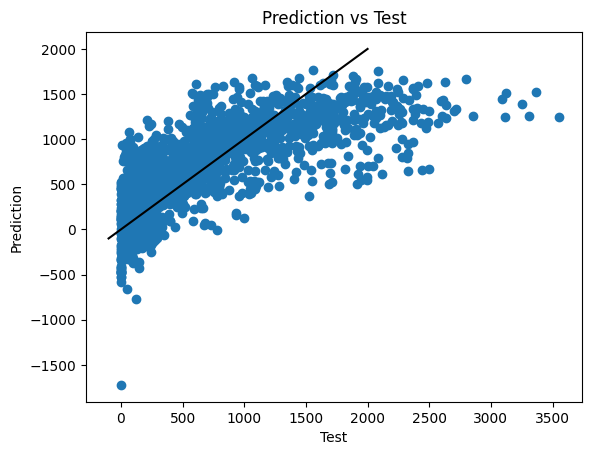

In [27]:
plt.scatter(y_test, y_pred)
plt.plot([-100,2000], [-100,2000], c='black')
plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Prediction vs Test')

plt.show()

Note que si esta regresión fuera un buen modelo predictor, entonces los puntos debiesen estar cerca de la identidad (linea negra), lo cual a simple vista no sucede.

### 1.2.2 Modelo preprocesado

Variables cíclicas

Si aplicaramos variables _Dummy_ o transformar con _One Hot Encoder_ a la fecha terminaríamos con 12 columnas para los meses, 7 columnas para los días de la semana y 24 columnas para la hora! En lugar de eso nos aprovecharemos de que todas estas variables son cíclicas, es decir, después de 23:00 hrs viene 00:00 hrs y el ciclo se vuelve a repetir, lo mismo para los meses del año y los días de la semana. Entonces podemos pensar en este ciclo como si fuera un _circulo_ utilizando el seno y el coseno de la fecha tenemos las coordenada de la fecha en el _circulo_. De esta forma las 23:00 y las 00:00 son cercanas en esta representación. Gracias a lo anterior nos quedamos con solo 2 columnas.

$\text{var_cos} = \cos(2π\; \text{var}/\text{periodo})$

$\text{var_sin} = \sin(2π\; \text{var}/\text{periodo})$

> a) ¿Por qué no simplemente usar solo el seno o solo el coseno?

Dado que nuestro propósito es proyectar los posibles valores de las variables en un circulo debido a su característica cíclica, necesitamos ambos valores (seno y coseno) para representar un punto en una circunferencia.

In [28]:
X_train['month_sin'] = np.sin(2 * np.pi * X_train['month'] / 12)
X_train['month_cos'] = np.cos(2 * np.pi * X_train['month'] / 12)

X_train['hour_sin'] = np.sin(2 * np.pi * X_train['Hour'] / 24)
X_train['hour_cos'] = np.cos(2 * np.pi * X_train['Hour'] / 24)

X_train['dayofweek_sin'] = np.sin(2 * np.pi * X_train['dayofweek'] / 7)
X_train['dayofweek_cos'] = np.cos(2 * np.pi * X_train['dayofweek'] / 7)


X_test['month_sin'] = np.sin(2 * np.pi * X_test['month'] / 12)
X_test['month_cos'] = np.cos(2 * np.pi * X_test['month'] / 12)

X_test['hour_sin'] = np.sin(2 * np.pi * X_test['Hour'] / 24)
X_test['hour_cos'] = np.cos(2 * np.pi * X_test['Hour'] / 24)

X_test['dayofweek_sin'] = np.sin(2 * np.pi * X_test['dayofweek'] / 7)
X_test['dayofweek_cos'] = np.cos(2 * np.pi * X_test['dayofweek'] / 7)

# Eliminamos las variables
X_train.drop(['month', 'Hour', 'dayofweek'], axis=1, inplace=True)
X_test.drop(['month', 'Hour', 'dayofweek'], axis=1, inplace=True)

> b) Aplique la misma lógica de variable _cíclica_ a la variable _Season_.

In [29]:
X_train['season_sin'] = np.sin(2 * np.pi * X_train['Seasons'] / 4) 
X_train['season_cos'] = np.cos(2 * np.pi * X_train['Seasons'] / 4)
X_train.drop('Seasons', axis=1, inplace=True)

In [30]:
X_test['season_sin'] = np.sin(2 * np.pi * X_test['Seasons'] / 4)
X_test['season_cos'] = np.cos(2 * np.pi * X_test['Seasons'] / 4)
X_test.drop('Seasons', axis=1, inplace=True)

Normalización de variables.

> c) Transforme las variables para que estas sigan una distribución normal con media 0 y varianza 1.



Normalizaremos todas las variables, pues ninguna tiene media 0 y varianza 1, como se aprecia a continuación,

In [31]:
print('Medias:\n')
print(X_train.mean())
print('\n\nVarianzas:\n')
print(X_train.var())

Medias:

Temperature(°C)                12.934033
Humidity(%)                    58.199201
Wind speed (m/s)                1.730765
Visibility (10m)             1436.833904
Dew point temperature(°C)       4.105579
Solar Radiation (MJ/m2)         0.575928
Rainfall(mm)                    0.143008
Snowfall (cm)                   0.077212
Holiday                         0.949772
Functioning Day                 0.966182
year                         2017.916524
month_sin                      -0.003330
month_cos                      -0.003659
hour_sin                       -0.000880
hour_cos                       -0.004713
dayofweek_sin                  -0.003052
dayofweek_cos                  -0.002672
season_sin                     -0.005280
season_cos                      0.006136
dtype: float64


Varianzas:

Temperature(°C)                 141.378289
Humidity(%)                     417.936337
Wind speed (m/s)                  1.074389
Visibility (10m)             372573.482898
Dew point t

In [32]:
X_scaler = preprocessing.StandardScaler()
y_scaler = preprocessing.StandardScaler()

X_train[X_train.columns] = X_scaler.fit_transform(X_train[X_train.columns])
y_train = y_scaler.fit_transform(np.array(y_train).reshape(-1, 1))

X_test[X_test.columns] = X_scaler.transform(X_test[X_test.columns])

> d) Utilice LinearRegression para entrenar el regresor y posteriormente obtener predicciones utilizando el testset.

In [33]:
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

> e) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [34]:
y_pred = reg.predict(X_test)
y_pred = y_scaler.inverse_transform(y_pred)

> f) Calcule el error cuadrático medio en la escala original de bicicletas

In [35]:
mse_prepro = mean_squared_error(y_test, y_pred)
mse_prepro

204285.74255976343

> g) ¿Mejoran los resultados con respecto al modelo entrenado sobre los datos en bruto?

Basados en el error cuadrático medio los resultados no mejoraron, sino que empeoraron.



In [36]:
mse_prepro > mse_bruto

True

> h) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

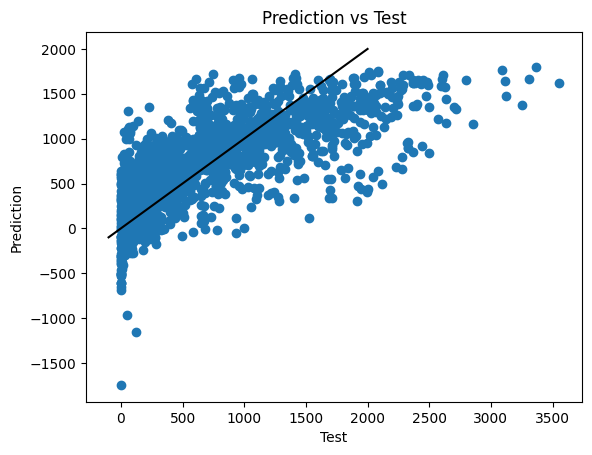

In [37]:
plt.scatter(y_test, y_pred)

plt.plot([-100,2000], [-100,2000], c='black')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Prediction vs Test')

plt.show()

Similar al comentario del gráfico para los datos en bruto, si el modelo predictor fuera bueno, los puntos visualmente se deberían aproximar a la identidad (curva en negro).

### 1.2.3 Modelo SGD

En esta pregunta aplicaremos el modelo de regresión lineal utilizando el gradiente descendente estocástico (SGD), y para visualizar su rendimiento observaremos el error cuadrático medio a medida que el algoritmo SGD va iterando a través de las _epochs_. Para ello necesitamos separar una porción del conjunto de entrenamiento y así obtener el error de validación del modelo en ejemplos que no ha visto.

> a) Separe el conjunto de entrenamiento en un subconjunto de entrenamiento y uno de validación.

In [38]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

Utilize la librería _sklearn_ para entrenar el modelo a través _SGDRegressor_ y responda las siguientes preguntas:

> b) ¿Para qué sirve cada uno de los parametros que acepta _SGDRegressor_? Describa brevemente cada uno.

Describiremos brevemente algunos de los parámetros más importantes que recibe la función basados en la documentación ([Fuente](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDRegressor.html)):

* loss: es la función de pérdida que se utilizará para entrenar el modelo. Puede ser 'squared_loss' (por defecto), 'huber', 'epsilon_insensitive' o 'squared_epsilon_insensitive'.

* penalty: es el término de regularización que se utilizará para penalizar los coeficientes de la regresión y evitar el sobreajuste. Puede ser 'l2' (por defecto), 'l1', 'elasticnet' o 'none'.

* alpha: es el parámetro de regularización que controla la fuerza de la penalización. Cuanto mayor sea el valor de alpha, mayor será la penalización y más restringidos serán los coeficientes.

* l1_ratio: es el parámetro que controla la mezcla de regularización l1 y l2 en la regularización de elasticnet. Cuando l1_ratio=1 se utiliza regularización l1, y cuando l1_ratio=0 se utiliza regularización l2.

* fit_intercept: es un indicador booleano que indica si se debe ajustar el intercepto en el modelo.

* max_iter: es el número máximo de iteraciones que se realizarán para ajustar el modelo.

* tol: es la tolerancia para el criterio de parada del algoritmo.

* epsilon: es el parámetro de la función de pérdida 'huber' que determina la zona de transición entre la región lineal y la región cuadrática.

* learning_rate: es la tasa de aprendizaje que se utilizará para actualizar los pesos del modelo en cada iteración.

* eta0: es la tasa de aprendizaje inicial que se utilizará para ajustar la tasa de aprendizaje en cada iteración.

* power_t: es el exponente utilizado en la actualización de la tasa de aprendizaje.

* early_stopping: es un indicador booleano que indica si se debe detener el ajuste del modelo cuando la pérdida en el conjunto de validación deja de mejorar.

* validation_fraction: es la fracción del conjunto de entrenamiento que se utilizará como conjunto de validación si early_stopping=True.

* n_iter_no_change: es el número de iteraciones que se permiten sin mejoras en la pérdida del conjunto de validación antes de detener el ajuste del modelo si early_stopping=True.

* shuffle: es un indicador booleano que indica si se deben barajar los datos en cada iteración.

* random_state: es una semilla para el generador de números aleatorios utilizado para barajar los datos si shuffle=True.


> c) Explique cuál es la función del parámetro alpha y compare, teóricamente, las variaciones de implementación del parámetro disponibles en el módulo, es decir, compare: _constant_ vs _optimal_ vs _invscaling_ vs _adaptive_.

Tal como se comentó anteriormente alpha es el parámetro de regularización que controla la fuerza de la penalización. Cuanto mayor sea el valor de alpha, mayor será la penalización y más restringidos serán los coeficientes.
* Constant: en este caso el parámetro se mantiene constante.
* Optimal: en este caso, el parámetro decae $1/t$ donde $t$ es el tiempo del paso.
* Invscaling: en este caso, el parámetro decae según una potencia: $1/t^{power_t}$.
* Adaptative: en este caso, el parámetro decrece solo si se alcanza el criterio de parada, si es el caso, se divide por 5 el valor actual.


Entrene el regresor SGD por 100 _epochs_ como máximo, utilizando *early_stoping* con una paciencia de 10 _epochs_. Grafique el error cuadrático medio por epoca y responda las siguientes preguntas:

In [39]:
reg = SGDRegressor(loss='squared_error', 
                   penalty=None,                    
                   tol=0.001, 
                   shuffle=True,                                                          
                   warm_start=True,
                   max_iter=100, #100 epochs
                   random_state=42, 
                   #early_stopping=True, #NO se puede iterar con True
                   n_iter_no_change=10
                   )

y_tr = np.asarray(y_tr).ravel()
y_test = np.asarray(y_test).ravel()

tr_errors, val_errors = [], []

# train the model using early stopping
n_epochs = 100
best_val_error = float('inf')
patience = 10  # stop trying if validation error doesn't improve after 10 epochs
epoch_since_best = 0
for epoch in range(n_epochs):
    
    reg.partial_fit(X_tr, y_tr)
    
    # collect the train and validation errors after each epoch
    y_tr_pred = reg.predict(X_tr)
    y_val_pred = reg.predict(X_val)
    tr_error = mean_squared_error(y_tr, y_tr_pred)
    val_error = mean_squared_error(y_val, y_val_pred)
    tr_errors.append(tr_error)
    val_errors.append(val_error)
    
    # check if validation error has improved
    if val_error < best_val_error:
        best_val_error = val_error
        epoch_since_best = 0
    else:
        epoch_since_best += 1
        if epoch_since_best >= patience:
            print(f"Stopping training after {epoch+1} epochs")
            break    

Stopping training after 15 epochs


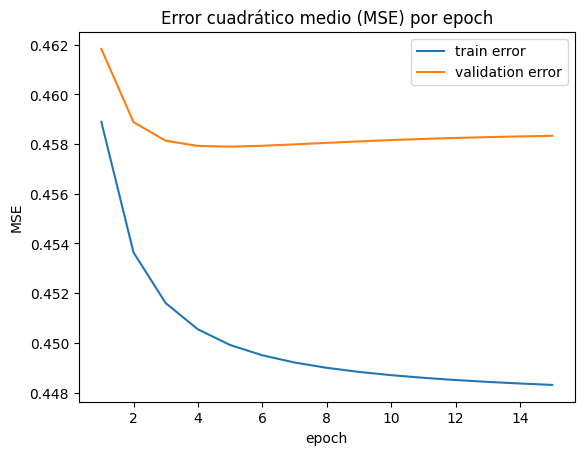

In [40]:
plt.plot(range(1,len(tr_errors)+1), tr_errors, label='train error')
plt.plot(range(1,len(val_errors)+1), val_errors, label='validation error')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.title('Error cuadrático medio (MSE) por epoch')
plt.legend()
plt.show()

Podemos observar que el MSE del train set es siempre menor que el MSE del validation set para cada epoch.

> d) ¿Para qué sirve el *early_stopping*?

Sirve para detener el entrenamiento del modelo antes de que haya completado todas las iteraciones o epochs programadas. Esto se hace para evitar el sobreajuste o el sobreentrenamiento del modelo.

> e) ¿Cómo se interpretan los resultados del entrenamiento según las curvas obtenidas?

Interpretamos que el error cuadrático medio (MSE) del conjunto de entrenamiento siempre está por debajo del MSE del conjunto de validación, lo cual sabemos que teóricamente en esperanza debe ocurrir. A medida que pasan las epoch el MSE del conjunto de entrenamiento decae mientras que el de validación no lo hace y sube ligeramente, lo que nos hace pensar que es posible que se esté produciendo sobreajuste, por lo cual hace sentido que pare el entrenamiento.

> f) ¿Cuántas _epochs_ duró su entrenamiento?

Duró 15 epochs el entrenamiento.

> g) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [41]:
y_pred = reg.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred.reshape(-1, 1))

> h) Calcule el error cuadrático medio en la escala original de bicicletas

In [42]:
mse_sgd = mean_squared_error(y_test, y_pred)
mse_sgd

204723.36101992353

> i) ¿Mejoran los resultados con respecto al modelo anterior?

Basados en el error cuadrático medio, no mejoraron los resultados.

In [43]:
mse_sgd > mse_prepro

True

> j) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

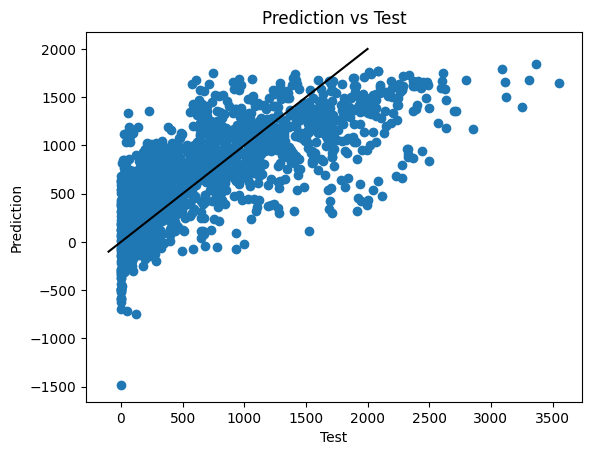

In [44]:
plt.scatter(y_test, y_pred)
plt.plot([-100,2000], [-100,2000], c='black')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Prediction vs Test')

plt.show()

Similar a los comentarios anteriores, si el modelo predictor fuera bueno, los puntos visualmente se deberían aproximar a la identidad (linea en negro), lo que no se aprecia en la imagen anterior.

## 1.3 Modelo con Regularización

### 1.3.1 Regularización Ridge y Lasso

Agregue regularización Ridge al modelo SGD y entrénelo por 100 _epochs_ como máximo, utilizando early_stoping con una paciencia de 10 _epochs_. Grafique el error cuadrático medio por _epoch_ y responda las siguientes preguntas:


> a) ¿Qué son los llamados _hiperparámetros_ de un modelo y como se relacionan con el concepto de _hyper tuning_?

Los hiperparámetros son parámetros que no están involucrados en el 
modelo de manera directa, sino mas bien, se usan para poder contralar el proceso de entrenamiento del modelo. Para saber que hiperparámetros ocupar uno hace hyperparameter tuning, lo cual es el proceso de encontrar la mejor combinación de hiperparámetros para nuestro modelo.


> b) ¿Cuál es la motivación de agregar una penalización al modelo?

Resulta beneficioso aplicar una penalización en ciertos contextos, ya que esto permite que algunos coeficientes de la regresión, que no deberían tener un impacto significativo, se vuelvan cero o adquieran valores muy pequeños. Como resultado, se obtiene un modelo en el que menos features de las originales sean relevantes para el problema, lo que ayuda a prevenir el sobreajuste y mejorar la capacidad de generalización del modelo.


> c) ¿De qué se compone la penalización mediante regularización Ridge?

La penalización que se ocupa en la regresión Ridge es simplemente agregar al mínimos cuadrados la suma cuadrática de los coeficientes, es decir, la norma L2, junto a un coeficiente de regularización.


> d) ¿Cómo funciona la regularización Lasso?

Es similar a la regresión Ridge, pero en cambio se ocupa la suma de los valores absolutos de los coeficientes (norma L1) como penalización.


> e) ¿Cuáles son las ventajas y desventajas de usar regularización Ridge versus Lasso?

Ridge tiene una forma cerrada para calcular, lo cual lo hace más fácil de ocupar que Lasso, debido a que al ocupar Lasso se tendría que que ocupar por ejemplo solvers para cada vez que se quieran calcular los coeficientes. Una ventaja de Lasso sobre Ridge es que Lasso puede eliminar features haciendo ciertos coeficientes igual a 0, en cambio Ridge puede hacer los coeficientes pequeño pero no los elimina.


> f) Utilizando GridSearchCV optimize el hiperparámetro _learning rate_ para los valores 0.1, 0.01, 0.001.

> g) Pruebe con distintos tipos de _learning rate_ 'constant', 'optimal', 'invscaling'.

> h) Optimize también los hiperparámetros de coeficiente de regularización de l2 y l1 para los valores 0.0001, 0.001, 0.01.

In [45]:
k=5
cv_folds=KFold(n_splits=k, shuffle=True)

In [46]:
reg = SGDRegressor(loss='squared_error', 
                   penalty='l2', # regularization therm
                   alpha=0.0001, # regularization coeficient
                   max_iter=100, #epochs
                   tol=0.001, 
                   shuffle=True,                                       
                   learning_rate='invscaling', # type of lr
                   eta0=0.01,    # learning rate coeficient
                   power_t=0.25                   
                   )

In [47]:
param_grid = {'eta0': [0.1, 0.01, 0.001], 
              'penalty': ['l2', 'l1'],
              'alpha': [0.0001, 0.001, 0.01],                
              'learning_rate': ['constant', 'optimal', 'invscaling']}

hypereg = GridSearchCV(reg, 
             param_grid, 
             scoring='neg_mean_squared_error',               
             refit=True, 
             cv=cv_folds, 
             verbose=0, 
            )

In [48]:
hypereg.fit(X_train, y_train.ravel())

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=SGDRegressor(max_iter=100),
             param_grid={'alpha': [0.0001, 0.001, 0.01],
                         'eta0': [0.1, 0.01, 0.001],
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'penalty': ['l2', 'l1']},
             scoring='neg_mean_squared_error')

> i) Obtenga los resultados para cada hiperparámetro de la grilla.

A continuación se presenta el dataframe con toda la información:

In [49]:
pd.DataFrame(hypereg.cv_results_).sort_values('rank_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_eta0,param_learning_rate,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
10,0.033572,0.008918,0.010590,0.002642,0.0001,0.01,invscaling,l2,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-4.459803e-01,-4.575340e-01,-4.480215e-01,-4.396874e-01,-4.731269e-01,-4.528700e-01,1.163485e-02,1
48,0.016542,0.006620,0.003012,0.000542,0.01,0.001,constant,l2,"{'alpha': 0.01, 'eta0': 0.001, 'learning_rate'...",-4.447975e-01,-4.594905e-01,-4.444686e-01,-4.423758e-01,-4.822240e-01,-4.546713e-01,1.506747e-02,2
29,0.019321,0.001891,0.004309,0.002998,0.001,0.01,invscaling,l1,"{'alpha': 0.001, 'eta0': 0.01, 'learning_rate'...",-4.463551e-01,-4.578446e-01,-4.472014e-01,-4.462001e-01,-4.758814e-01,-4.546965e-01,1.145997e-02,3
13,0.051207,0.032399,0.011032,0.007120,0.0001,0.001,constant,l1,"{'alpha': 0.0001, 'eta0': 0.001, 'learning_rat...",-4.457272e-01,-4.575490e-01,-4.507933e-01,-4.429283e-01,-4.766618e-01,-4.547319e-01,1.203975e-02,4
46,0.015095,0.002073,0.002870,0.000137,0.01,0.01,invscaling,l2,"{'alpha': 0.01, 'eta0': 0.01, 'learning_rate':...",-4.455590e-01,-4.602942e-01,-4.488865e-01,-4.413398e-01,-4.781035e-01,-4.548366e-01,1.322707e-02,5
31,0.019636,0.001810,0.003767,0.002118,0.001,0.001,constant,l1,"{'alpha': 0.001, 'eta0': 0.001, 'learning_rate...",-4.486830e-01,-4.573494e-01,-4.509131e-01,-4.423043e-01,-4.771975e-01,-4.552895e-01,1.196341e-02,6
11,0.048841,0.007981,0.008981,0.003816,0.0001,0.01,invscaling,l1,"{'alpha': 0.0001, 'eta0': 0.01, 'learning_rate...",-4.487908e-01,-4.566732e-01,-4.474492e-01,-4.480368e-01,-4.761093e-01,-4.554119e-01,1.087758e-02,7
30,0.014380,0.006019,0.002648,0.000160,0.001,0.001,constant,l2,"{'alpha': 0.001, 'eta0': 0.001, 'learning_rate...",-4.509718e-01,-4.587423e-01,-4.514524e-01,-4.425845e-01,-4.773337e-01,-4.562170e-01,1.173328e-02,8
28,0.012431,0.000904,0.002634,0.000207,0.001,0.01,invscaling,l2,"{'alpha': 0.001, 'eta0': 0.01, 'learning_rate'...",-4.458005e-01,-4.574116e-01,-4.578172e-01,-4.421072e-01,-4.779562e-01,-4.562186e-01,1.252334e-02,9
12,0.024004,0.009826,0.007312,0.004618,0.0001,0.001,constant,l2,"{'alpha': 0.0001, 'eta0': 0.001, 'learning_rat...",-4.446317e-01,-4.589087e-01,-4.579287e-01,-4.411355e-01,-4.786559e-01,-4.562521e-01,1.323135e-02,10


Podemos ver que la mejor combinación de hiperparámetros es:

In [50]:
print(*[f"{key} : {value}" for key, value in hypereg.best_params_.items()], sep = "\n")

alpha : 0.0001
eta0 : 0.01
learning_rate : invscaling
penalty : l2


> j) Obtenga la predicción del regresor ya entrenado sobre el conjunto de prueba, aplicando la transformación inversa para _volver a la escala original_ de bicicletas.

In [51]:
y_pred = hypereg.predict(X_test)

y_pred = y_scaler.inverse_transform(y_pred.reshape(-1,1))

> k) Calcule el error cuadrático medio en la escala original de bicicletas

In [52]:
mse_regu=mean_squared_error(y_test, y_pred)
mse_regu

204277.49388866193

> l) ¿Mejoran los resultados con respecto a los modelo anteriores?

No mejoran los resultados.

In [53]:
mse_regu>mse_prepro

False

> m) Grafique los resultados de la predicción (y_pred) versus los target de la prueba (y_test)

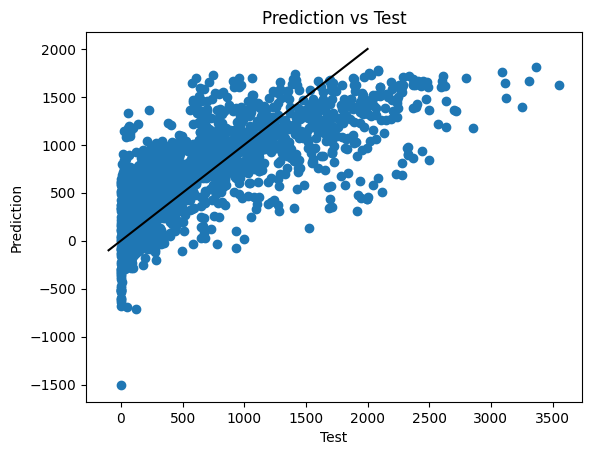

In [54]:
plt.scatter(y_test, y_pred)

plt.plot([-100,2000], [-100,2000], c='black')

plt.xlabel('Test')
plt.ylabel('Prediction')
plt.title('Prediction vs Test')

plt.show()

## 1.4 Conclusiones:

Notamos que la regresión con los datos en bruto no se comporta bien, por lo que se decidió procesar los datos y ocupar regularizaciones para mejorar la capacidad de generalización del modelo y obtener mejores resultados, pero ocurrió lo contrario y los resultados empeoraron, por lo que se puede concluir que un modelo de regresión lineal no es adecuado para lograr captar el comportamiento de los datos, y de esta manera es que se obtuvieron resultados deficientes, por lo que se podría proponer algún modelo distinto que se adecúe más a los datos.

Finalmente, en caso de que tengamos que recomendar alguno de los modelos propuestos, basandonos en la métrica del error cuadrático medio nos quedaríamos con la regresión con los datos brutos debido a que fue la que nos dió el menor valor, aunque su rendimiento fue bastante deficiente, sería bueno medir el comportamiento de los modelos con otras métricas.

# 2. Clasificación de hongos





La tarea de clasificación se refiere a un problema en el que se tiene un conjunto de datos y se quiere predecir la clase a la que pertenece cada elemento del conjunto de datos.

Para hacer esto, utilizaríamos un algoritmo de clasificación que examina las características de cada fruta en el conjunto de datos y aprende patrones que pueden ser utilizados para predecir su clase.

Hay muchos algoritmos de clasificación diferentes que se pueden utilizar en el aprendizaje automático, por ejemplo la regresión logística, el SVM (máquina de soporte vectorial), Random Forest y redes neuronales, etcétera.

Una vez que se entrena el modelo, se utiliza para predecir la clase de nuevos datos que no se incluyeron en el conjunto de datos original. Para medir el desempeño del modelo, se pueden utilizar diferentes métricas de evaluación, como la precisión, el recall y la F1-score.

La tarea de clasificación es muy útil en muchas áreas, como la medicina, la banca, el comercio electrónico y la publicidad, ya que permite la automatización de tareas que antes requerían una gran cantidad de tiempo y recursos humanos.

<center><img src=https://w0.peakpx.com/wallpaper/496/595/HD-wallpaper-red-mushroom-mushroom-red-beautiful.jpg></center>

Este conjunto de datos incluye descripciones de muestras correspondientes a 23 especies de hongos de la familia Agaricus y Hongo Lepiota extraídas de la Guía de campo de hongos norteamericanos de la Audubon Society. Cada especie se identifica como definitivamente comestible, definitivamente venenosa o de comestibilidad desconocida y no recomendada. Esta última clase se ha combinado con la venenosa.

## 2.1 Manipulación y exploración del conjunto de datos

In [55]:
!kaggle datasets download -d uciml/mushroom-classification

  0% 0.00/34.2k [00:00<?, ?B/s]
100% 34.2k/34.2k [00:00<00:00, 38.7MB/s]


In [56]:
!unzip mushroom-classification.zip

Archive:  mushroom-classification.zip
  inflating: mushrooms.csv           


In [57]:
df = pd.read_csv('/content/mushrooms.csv')

In [58]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [59]:
def datainfo():
    temp_ps = pd.DataFrame(index=df.columns)
    temp_ps['DataType'] = df.dtypes
    temp_ps["Non-null_Values"] = df.count()
    temp_ps['Unique_Values'] = df.nunique()
    temp_ps['NaN_Values'] = df.isnull().sum()
    temp_ps['NaN_Values_Percentage'] = (temp_ps['NaN_Values']/len(df))*100 
    return temp_ps

datainfo()

,DataType,Non-null_Values,Unique_Values,NaN_Values,NaN_Values_Percentage
class,object,8124,2,0,0.0
cap-shape,object,8124,6,0,0.0
cap-surface,object,8124,4,0,0.0
cap-color,object,8124,10,0,0.0
bruises,object,8124,2,0,0.0
odor,object,8124,9,0,0.0
gill-attachment,object,8124,2,0,0.0
gill-spacing,object,8124,2,0,0.0
gill-size,object,8124,2,0,0.0
gill-color,object,8124,12,0,0.0


Notamos que tenemos 23 variables incluyendo el target, todas son del tipo categórica y no presentan datos faltantes.

### 2.1.1 Exploración de features

> a) ¿Por qué la variable _veil-type_ no aporta ningún valor al entrenamiento? Grafique, justifique y elimine la columna.

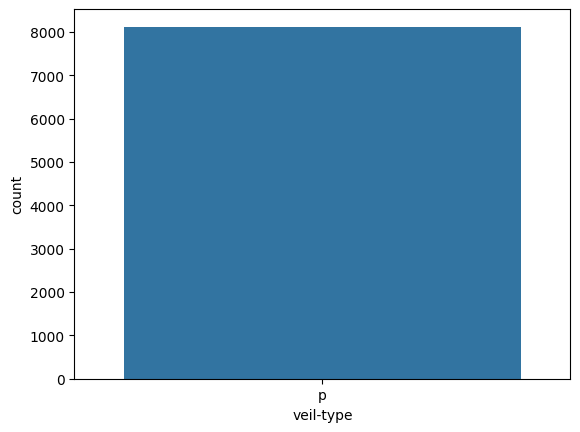

In [60]:
sns.countplot(x="veil-type", data=df);

Según el countplot la variable solo presenta una categoría, es decir, todos los valores de la columna son iguales a 'p'. Por ende, la variable "veil-type" no aporta ningún valor al entrenamiento pues no hay variabilidad en los datos. Procedemos a eliminar dicha variable:

In [61]:
df.drop('veil-type', axis=1, inplace=True)

> b) Grafique la distribución de cada variable

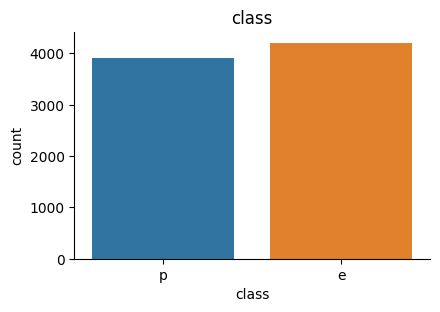

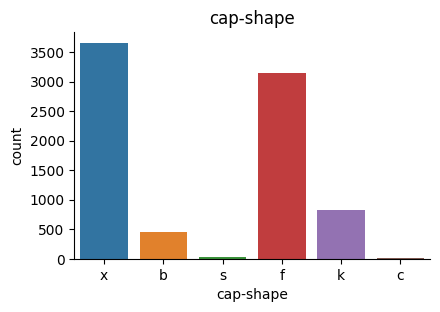

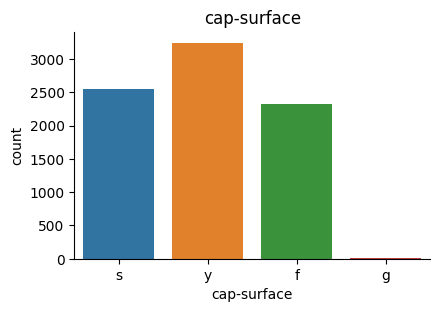

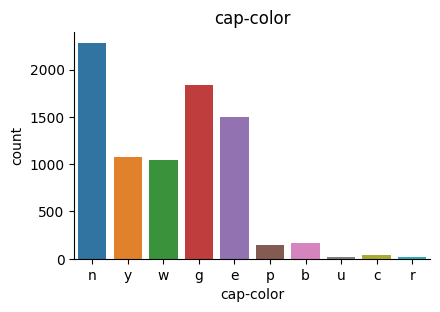

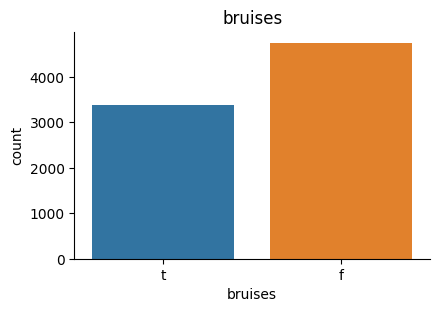

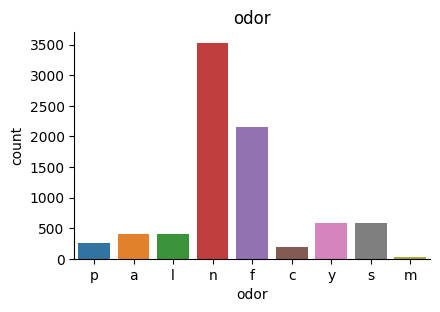

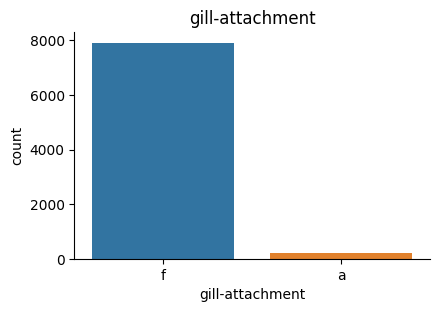

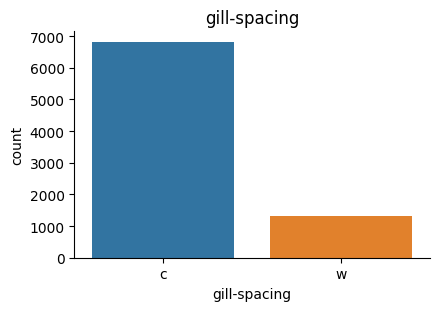

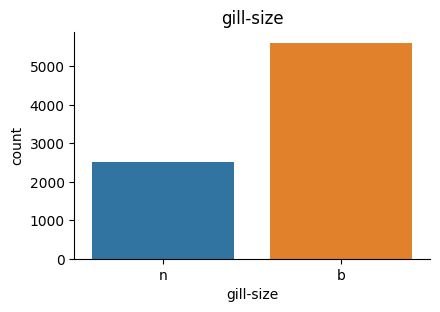

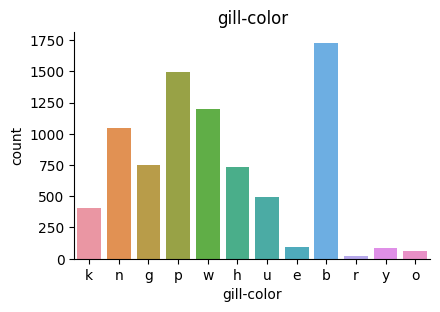

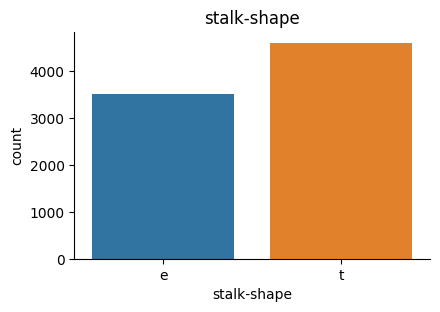

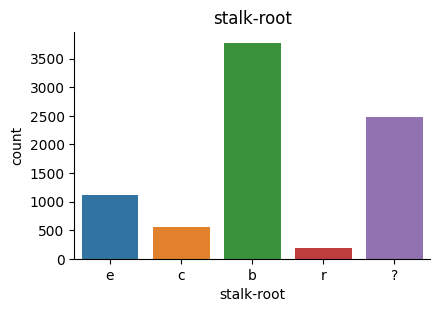

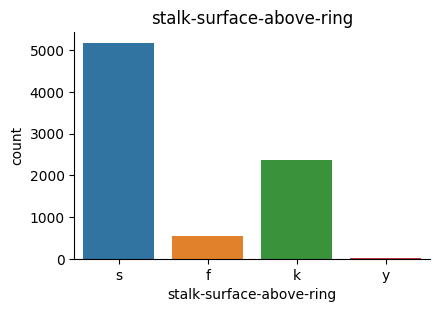

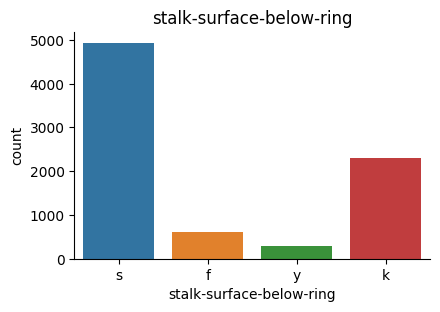

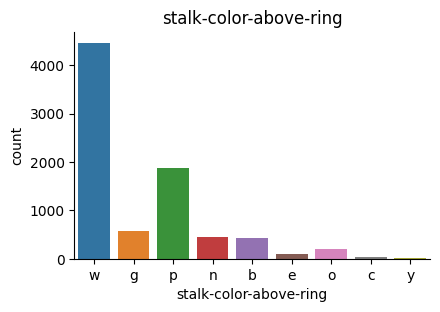

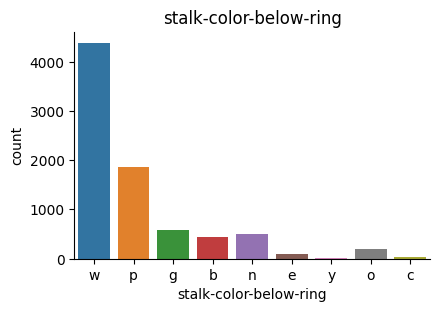

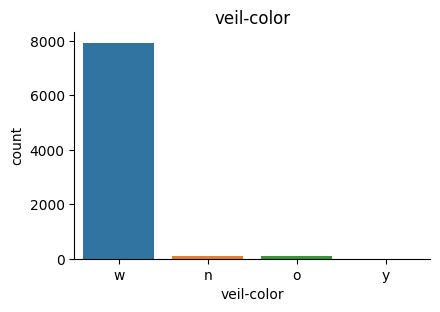

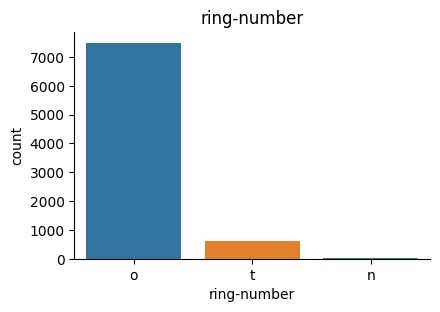

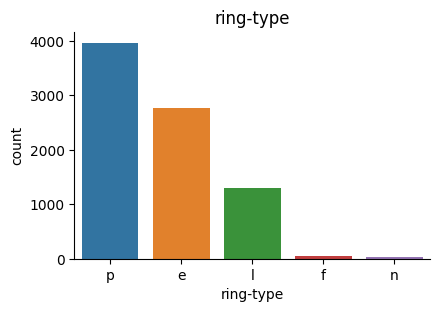

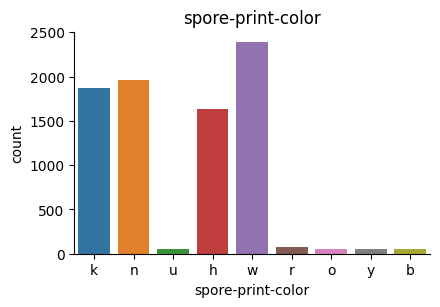

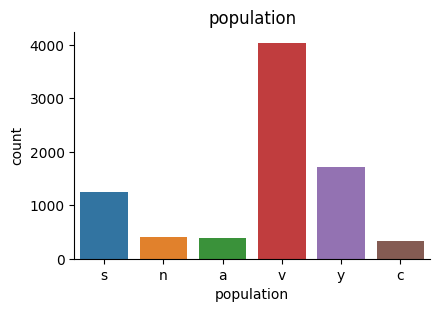

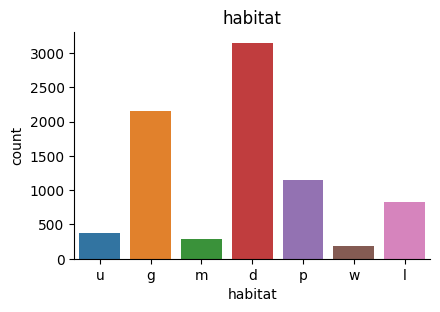

In [62]:
for col in df.columns:    
    sns.catplot(x=col, kind="count", data=df, height=3, aspect=1.5)
    print()
    plt.title(col)
    plt.show()

De lo gráficos podemos comentar lo siguiente: 
*   La variable target: *class*, no presenta una predominancia significativa de ninguna categoría, lo cual es bueno para el entrenamiento de los modelos.
*   Algunas variables como: *cap-color*, *odor*, *gill-color*, *stalk-color-above-ring* tienen bastantes categorías en comparación al resto de variables, predominando algunas categorías, lo cual provoca un desbalance en las variables.
* Similar al comentario anterior, los datos de las variables *gill-attachment*, *veil-color* y *ring-number* tienen una evidente desproporción, predominando una sola categoría en cada caso, lo cual nos hace pensar que son más comunes los hongos con esas caracteristicas en cada variable.


> c) Separe el conjunto de datos en los subconjuntos de entrenamiento y prueba.

In [63]:
train_set, test_set = train_test_split(df, test_size=0.3, random_state=42)

> d) Codifique las variables de entrada para que puedan ser trabajadas en las siguientes preguntas.

Notamos que al binarizar por separado puede que el mapeo sea inverso en cada subconjunto. Considere el siguiente código que lo ejemplifica:

In [64]:
# DataFrames de ejemplo
train = pd.DataFrame({
    'color': ['verde', 'rojo', 'verde', 'rojo', 'verde', 'verde']
})

test = pd.DataFrame({
    'color': ['rojo', 'verde', 'rojo', 'rojo']
})

# Codificar la columna 'color' en formato numérico
train['color_codificado'] = pd.factorize(train['color'])[0]
test['color_codificado'] = pd.factorize(test['color'])[0]

print(f"{train=}\n\n{test=}")

train=   color  color_codificado
0  verde                 0
1   rojo                 1
2  verde                 0
3   rojo                 1
4  verde                 0
5  verde                 0

test=   color  color_codificado
0   rojo                 0
1  verde                 1
2   rojo                 0
3   rojo                 0


Se aprecia del ejemplo que al convertir las variables binarias a 0/1 depende del orden en que aparecen sus valores únicos, en el ejemplo anterior, para el conjunto train verde = 0 y rojo = 1, pero para el conjunto test el mapeo es al revés. 

Esto trae problemas al momento de evaluar el modelo, pues al predecir el conjunto de testeo en el modelo estaremos posiblemente entregando los valores al revés, por lo que usaremos el mapeo que se hace en el conjunto de entrenamiento para mapear en el conjunto de testeo. 

In [65]:
# Mapeo de variable target
map_class = {pd.factorize(train_set['class'])[1][0] : 0, pd.factorize(train_set['class'])[1][1] : 1}
print(f"Tenga presente el mapeo de la variable target: {map_class}")

Tenga presente el mapeo de la variable target: {'p': 0, 'e': 1}


In [66]:
# create a list to store the columns to be dropped
drop_cols = []

# iterate over columns and check for binary variables
for col in train_set.columns:
    if len(train_set[col].unique()) == 2:
        # convert binary variables to 0/1
        test_set[col] = test_set[col].map({pd.factorize(train_set[col])[1][0] : 0,
                                          pd.factorize(train_set[col])[1][1] : 1})
        train_set[col] = pd.factorize(train_set[col])[0]
    else:
        # get dummies for categorical variables with more than 2 categories
        train_set = pd.concat([train_set, pd.get_dummies(train_set[col], prefix=col)], axis=1)
        test_set = pd.concat([test_set, pd.get_dummies(test_set[col], prefix=col)], axis=1)
        # add the original column to the list of columns to be dropped
        drop_cols.append(col)

# drop the original categorical columns from the train and test sets
train_set.drop(drop_cols, axis=1, inplace=True)
test_set.drop(drop_cols, axis=1, inplace=True)

# ensure that the train and test sets have the same columns
train_set, test_set = train_set.align(test_set, join='outer', axis=1, fill_value=0)

# print the shapes of the train and test sets
print('Train set shape:', train_set.shape)
print('Test set shape:', test_set.shape)

Train set shape: (5686, 112)
Test set shape: (2438, 112)


> e) Separe los subconjuntos en _X_ e _y_

In [67]:
X_train = train_set.drop('class', axis=1)
y_train = train_set['class']
X_test = test_set.drop('class', axis=1)
y_test = test_set['class']

### 2.1.2 Principal Component Analisis

PCA (Principal Component Analysis) es una técnica de reducción de dimensionalidad comúnmente usada en machine learning para reducir el número de características en el conjunto de datos conservando la información más importante.

> a) Aplique PCA a los datos preprocesados para reducir el número de características a un conjunto más pequeño de componentes principales que capturen los patrones más importantes de los datos. Pruebe con n_components = n_features - k, donde k={1,10,50}, es decir, cree 3 posibles transformaciones de "*X_train*" y apliquelas sobre "*X_test*".

**Nota:** En adelante se le llamará "representación de los datos" a las distintas _feature selection/extraction_, por ejemplo: una posible representación de los datos es aplicar PCA con las 80 componentes principales.

In [68]:
pca1 = PCA(n_components=X_train.shape[1] - 1)
pca10 = PCA(n_components=X_train.shape[1] - 10)
pca50 = PCA(n_components=X_train.shape[1] - 50)

X_train_pca1 = pca1.fit_transform(X_train)
X_train_pca10 = pca10.fit_transform(X_train)
X_train_pca50 = pca50.fit_transform(X_train)

# Transformamos los datos de testeo con cada PCA
X_test_pca1 = pca1.transform(X_test)
X_test_pca10 = pca10.transform(X_test)
X_test_pca50 = pca50.transform(X_test)

### 2.1.3 Mutual Information

La información mutua es una medida de dependencia entre variables, se puede usar para medir el grado de asociación entre las _features_ y el _target_, y usar esta información para seleccionar las _features_ más relevantes para posteriormente realizar la clasificación. Al utilizar la información mutua para seleccionar las características más informativas, puede mejorar potencialmente el rendimiento de su modelo de aprendizaje automático reduciendo la cantidad de información irrelevante o redundante en el conjunto de datos.

> a) Calcule la información mutua entre cada característica y la variable objetivo (comestible o venenoso) para medir el grado de asociación entre cada característica y la variable objetivo.


In [69]:
mi = mutual_info_classif(X_train, y_train)

mi_df = pd.DataFrame({'variable': X_train.columns, 'mi': mi})
mi_df

,variable,mi
0,bruises,0.133336
1,gill-attachment,0.009538
2,gill-spacing,0.062758
3,gill-size,0.165946
4,stalk-shape,0.001490
...,...,...
106,habitat_l,0.012184
107,habitat_m,0.018527
108,habitat_p,0.057517
109,habitat_u,0.020714



> b) Seleccione las n características con las puntuaciones de información mutua más altas como entrada para un modelo de aprendizaje automático. Pruebe con n = n_features - k, para k={1,10,50}, es decir, cree 3 posibles transformaciones de "X_train" y apliquelas sobre "X_test".




In [70]:
# Ordenamos las variables por su información mutua en orden descendente
mi_df = mi_df.sort_values('mi', ascending=False)

#Creamos las transformaciones de los conjuntos Train y Set para cada k=1,10,50
X_train_mi1 = X_train[mi_df.variable[:(X_train.shape[1]-1)]]
X_test_mi1 = X_test[mi_df.variable[:(X_train.shape[1]-1)]]

X_train_mi10 = X_train[mi_df.variable[:(X_train.shape[1]-10)]]
X_test_mi10 = X_test[mi_df.variable[:(X_train.shape[1]-10)]]

X_train_mi50 = X_train[mi_df.variable[:(X_train.shape[1]-50)]]
X_test_mi50 = X_test[mi_df.variable[:(X_train.shape[1]-50)]]

## 2.2 Modelos de clasificación

Primero entrenaremos el modelo Naïve Bayes con los conjuntos de datos de entrenamiento generados en el punto 2.1, luego entrenaremos otros clasificadores utilizando como conjunto de entrenamiento la mejor representación de los datos según las metricas de clasificación obtenidas con el modelo Naïve Bayes.

### 2.2.1 Naïve Bayes

Naïve Bayes es un modelo generativo clásico para la clasificación en el aprendizaje automático. En el contexto de la clasificación de hongos, puede utilizar Naïve Bayes para modelar la distribución de probabilidad de cada característica dada la etiqueta de clase (comestible o venenosa) y utilizar la regla de Bayes para calcular la probabilidad posterior de cada etiqueta de clase dadas las características observadas.

Al utilizar Naïve Bayes para la clasificación, se puede conseguir un buen rendimiento con cantidades relativamente pequeñas de datos de entrenamiento y modelos relativamente sencillos. Sin embargo, Naïve Bayes asume que las características son condicionalmente independientes dada la etiqueta de clase, lo que puede no ser cierto en la práctica. No obstante, Naïve Bayes puede ser un modelo _baseline_ útil para comparar con modelos más complejos.

Dado el conjuntos de entrenamiento con características observadas, se utiliza la regla de Bayes para calcular la probabilidad a posteriori de cada etiqueta de clase dadas las características observadas. La etiqueta de clase con la probabilidad a posteriori más alta sería la etiqueta de clase predicha para la muestra de hongos.

Si consideramos que $P(x_1, \dots, x_n)$ es constante, entonces:

\begin{align}\begin{aligned}P(y \mid x_1, \dots, x_n) \propto P(y) \prod_{i=1}^{n} P(x_i \mid y)\\\Downarrow\\\hat{y} = \arg\max_y P(y) \prod_{i=1}^{n} P(x_i \mid y).\end{aligned}\end{align}

Usted deberá utilizar la estimación Máxima A Posteriori (MAP) para estimar $P(y)$ y $P(x_i \mid y)$, donde $P(y)$ es la frecuancia relativa de la clase $y$ y $P(x_i \mid y)$ asumiremos que se distribuye de forma Gaussiana, es decir:

\begin{align}\begin{aligned}P(x_i \mid y) = \frac{1}{\sqrt{2\pi\sigma^2_y}} \exp\left(-\frac{(x_i - \mu_y)^2}{2\sigma^2_y}\right)\end{aligned}\end{align}

> a) ¿Qué otras distribuciones de probabilidad se pueden asumir para este problema considerando los valores posibles de las _features_ y del target en el conjunto de datos? Nombre mínimo 2.

Como posible distribución a ocupar puede ser la Bernoulli dado que intervienen  variables binarias, que son las variables dummies que creamoas anteriormente. Otra distribución podría ser la binomial debido que al combinar las variables dummies dentro de la variable original que se crearon, podemos ver esta como suma de bernoullis, es decir, la variable en general sería una binomial.

Para las preguntas b) y c) considere que los datos siguen una distribución de probabilidad Gaussiana y entrene el clasificador utilizando el módulo _GaussianNB_ de la librería _sklearn_.

> b) Entrene el clasificador Naïve Bayes con los datos en _bruto_, es decir, tal cual como vienen, sin haber aplicado ninguna extracción o selección de características.


              precision    recall  f1-score   support

   poisonous       0.93      1.00      0.96      1181
      edible       1.00      0.93      0.96      1257

    accuracy                           0.96      2438
   macro avg       0.96      0.96      0.96      2438
weighted avg       0.96      0.96      0.96      2438



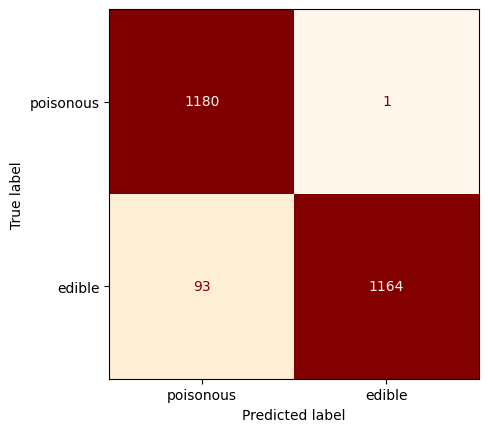

In [71]:
nb_bruto = GaussianNB()

# Entrenamos el clasificador con los datos en bruto
nb_bruto.fit(X_train, y_train)

# Realizamos predicciones en el conjunto de test
y_pred = nb_bruto.predict(X_test)

# Generamos el reporte 
report = classification_report(y_test, y_pred, target_names = ['poisonous','edible'])

print(report)

ConfusionMatrixDisplay.from_estimator(nb_bruto,
                                      X_test,
                                      y_test,
                                      cmap=plt.cm.OrRd,
                                      display_labels=  ['poisonous','edible'],
                                      colorbar=False);

Podemos ver que entre todas las métricas calculadas, la mínima es de 0.93, por lo que a pesar de que es el modelo con los datos en brutos, ya se puede apreciar un rendimiento bastante decente.


> c) Entrene el clasificador Naïve Bayes con cada una de las representaciones obtenidas en el punto 2.1.

Guardaremos la información de cada representación en un DataFrame:

In [72]:
repres = pd.DataFrame({
    'repre' : ['pca1', 'pca10', 'pca50', 'mi1', 'mi10', 'mi50'],
    'X_train': [X_train_pca1, X_train_pca10, X_train_pca50, X_train_mi1, X_train_mi10, X_train_mi50],
    'X_test': [X_test_pca1, X_test_pca10, X_test_pca50, X_test_mi1, X_test_mi10, X_test_mi50]
})

In [73]:
models = []
y_preds = []
for _, row in repres.iterrows():
    nb = GaussianNB()
    nb.fit(row['X_train'], y_train)
    y_pred = nb.predict(row['X_test'])
    models.append(nb)
    y_preds.append(y_pred)
repres['Clasificador'] = models
repres['y_pred'] = y_preds

In [74]:
repres.head(6)

,repre,X_train,X_test,Clasificador,y_pred
0,pca1,"[[-0.40381259743881154, 0.37163927177775313, 0...","[[-0.6919016461385915, -0.6266395576106093, 1....",GaussianNB(),"[1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, ..."
1,pca10,"[[-0.40381259743881154, 0.37163927177775313, 0...","[[-0.6919016461385915, -0.6266395576106093, 1....",GaussianNB(),"[1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, ..."
2,pca50,"[[-0.4038125974388309, 0.37163927177780526, 0....","[[-0.6919016461385924, -0.6266395576106004, 1....",GaussianNB(),"[1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, ..."
3,mi1,odor_n odor_f stalk-surface-above-ring...,odor_n odor_f stalk-surface-above-ring...,GaussianNB(),"[1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, ..."
4,mi10,odor_n odor_f stalk-surface-above-ring...,odor_n odor_f stalk-surface-above-ring...,GaussianNB(),"[0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, ..."
5,mi50,odor_n odor_f stalk-surface-above-ring...,odor_n odor_f stalk-surface-above-ring...,GaussianNB(),"[1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, ..."


> d) Para cada representación de los datos del punto 2.1, obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [75]:
reportes = []
for _, row in repres.iterrows():
  report = classification_report(y_test, row['y_pred'], target_names = ['poisonous','edible'])
  reportes.append(report)
  print(f"Reporte de {row['repre']}:\n {report}\n\n")

repres['Reporte'] = reportes

Reporte de pca1:
               precision    recall  f1-score   support

   poisonous       0.89      0.93      0.91      1181
      edible       0.93      0.89      0.91      1257

    accuracy                           0.91      2438
   macro avg       0.91      0.91      0.91      2438
weighted avg       0.91      0.91      0.91      2438



Reporte de pca10:
               precision    recall  f1-score   support

   poisonous       0.89      0.93      0.91      1181
      edible       0.93      0.89      0.91      1257

    accuracy                           0.91      2438
   macro avg       0.91      0.91      0.91      2438
weighted avg       0.91      0.91      0.91      2438



Reporte de pca50:
               precision    recall  f1-score   support

   poisonous       0.98      0.87      0.92      1181
      edible       0.89      0.99      0.94      1257

    accuracy                           0.93      2438
   macro avg       0.94      0.93      0.93      2438
weighted avg  

> e) Determine la mejor representación de los datos según las metricas obtenidas en la pregunta anterior y utilice esa representación de aquí en adelante para entrenar a los otros clasificadores.

Consideramos que es más importante predecir de buena manera los hongos venenosos que los comestibles, esto es debido a que una mala predicción de los venenosos puede llevar a situciones posiblemente mortales, en cambio predecir mal un comestible significaría no poder consumir un hongo, es por esto que buscaremos maximizar el recall de los venenosos y para no perder la capacidad predictiva general consideraremos un umbral razonable del f1-score, para venenoso y comestible, debido a que este es una media armónica entre precisión y recall, en nuestro caso el umbral será 0.9.

Finalmente por estas consideraciones nos quedaremos con los datos que eliminaron 1 features mediante información mutua.

In [87]:
X_train_best = repres.loc[repres.repre == 'mi1','X_train'].iloc[0]
X_test_best = repres.loc[repres.repre == 'mi1','X_test'].iloc[0]

y_pred_best = repres.loc[repres.repre == 'mi1','y_pred'].iloc[0]


> f) Muestre los errores tipo 1 y tipo 2.

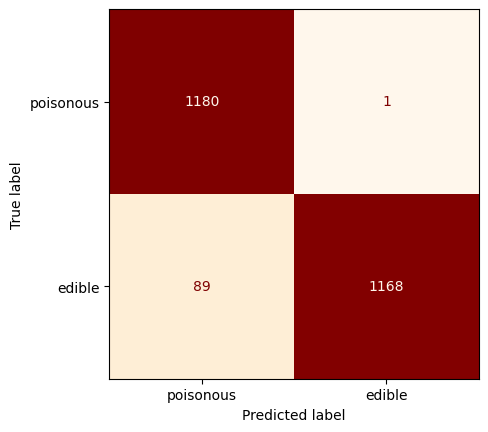

In [88]:
ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_pred_best,
                                        display_labels=['poisonous','edible'],
                                        cmap=plt.cm.OrRd,
                                        colorbar=False);

Considerando como True el venenoso, nos queda que el error de tipo I es 1 y el  error de tipo II es 89.

### 2.2.2 Linear Discriminant Analisis

El análisis discriminante lineal (LDA) es un algoritmo clásico de clasificación lineal, y su objetivo es encontrar una combinación lineal de características que maximice la separación entre las dos clases (setas comestibles y venenosas). En otras palabras, el LDA intenta proyectar los datos en un espacio de menor dimensión, preservando al mismo tiempo la mayor discriminación de clases posible.

La etiqueta de clase con la media más cercana en el espacio transformado sería la etiqueta de clase predicha para la muestra de setas.

> a) ¿Qué es lo que asume el modelo LDA sobre la distribución condicional de las clases?

El modelo de Análisis Discriminante Lineal asume que las distribuciones condicionales de las clases (es decir, la distribución de las variables de entrada para cada clase) son normales.

Además, LDA también asume que las variables son independientes y que las medias de las distribuciones condicionales son distintas entre sí, lo que significa que cada clase tiene una media diferente para cada variable.


> b) ¿Qué es lo que asume el modelo LDA sobre las matrices de covarianza de la distribución condicional?

Asume que tienen la misma matriz de covarianza, es decir, que la covarianza de las variables es la misma para todas las clases. 

> c) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

In [89]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_best, y_train)

y_pred_lda = lda.predict(X_test_best)

> d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [90]:
print(classification_report(y_test, y_pred_lda, target_names=['poisonous','edible']))

              precision    recall  f1-score   support

   poisonous       1.00      1.00      1.00      1181
      edible       1.00      1.00      1.00      1257

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Notamos que este modelo tiene un muy buen rendimiento con esta representación de los datos.

> e) Muestre los errores tipo 1 y tipo 2.

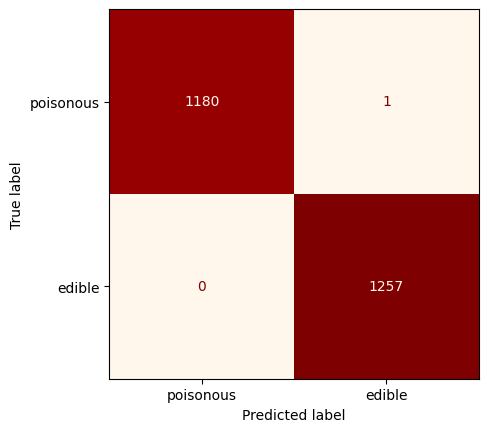

In [91]:
ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_pred_lda,
                                        display_labels=['poisonous','edible'],
                                        cmap=plt.cm.OrRd,
                                        colorbar=False);

No hay error de tipo II y el error de tipo I es 1.

### 2.2.3 Regresión logística

La regresión logística es un modelo discriminativo de clasificación clásico que puede utilizarse para la clasificación de hongos. El objetivo de la regresión logística es encontrar el modelo lineal que mejor se ajuste y que pueda predecir la probabilidad de que cada muestra de hongo pertenezca a una clase determinada (comestible o venenosa).

> a) ¿En qué consiste la estimación de máxima verosimilitud de coeficientes?

Consiste en encontrar los valores óptimos de los coeficientes del modelo que maximizan la probabilidad de observar los datos de entrenamiento dados los valores de las características y la variable objetivo, concretamente se maximiza la densidad conjunta de las variables como función de los coeficientes. 

> b) ¿Qué asume este modelo de la relación entre las características y la variable objetivo?

La regresión logística asume que la relación entre las características y la variable objetivo es lineal en la escala logarítmica de las probabilidades. Es decir, que el logaritmo de la razón de las probabilidades de pertenecer a una clase u otra es una combinación lineal de las características.

> c) ¿Qué se hace para evitar el sobreajuste de este modelo?

Para evitar el sobreajuste de la regresión logística se puede utilizar regularización como L1 o L2. La regularización L1 añade una penalización proporcional al valor absoluto de los coeficientes, lo que conduce a la selección automática de características. La regularización L2 añade una penalización proporcional al cuadrado de los coeficientes, lo que reduce su magnitud pero no los anula completamente.

> d) Entrene este clasificador con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

**Nota:** Usted puede variar o probar con distintos hiperparámetros siempre y cuando se utilizen de forma correcta el modelo y los datos para que pueda obtener predicciones comparables con los otros modelos. Puede basarse en los hiperparámetros probados con el regresor logistico y en la documentación de la librería.

In [92]:
lr = LogisticRegression()

lr.fit(X_train_best, y_train)

y_pred_lr = lr.predict(X_test_best)

> e) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [93]:
print(classification_report(y_test, y_pred_lr, target_names=['poisonous','edible']))

              precision    recall  f1-score   support

   poisonous       1.00      1.00      1.00      1181
      edible       1.00      1.00      1.00      1257

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Podemos notar que los rendimientos son perfectos según estas métricas y el conjunto de testeo. No fue necesario ajustar hiperparámetros.

> f) Muestre los errores tipo 1 y tipo 2.

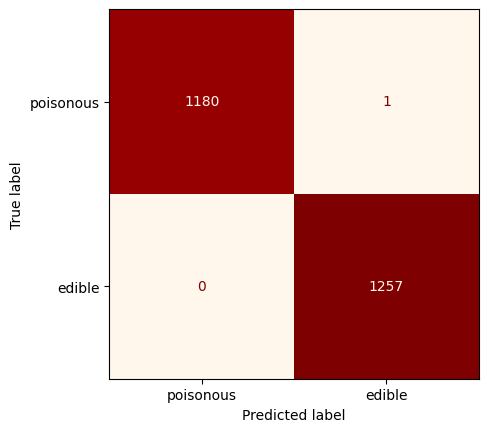

In [94]:
ConfusionMatrixDisplay.from_predictions(y_test,
                                        y_pred_lr,
                                        display_labels=['poisonous','edible'],
                                        cmap=plt.cm.OrRd,
                                        colorbar=False);

De la matriz se puede ver que el error de tipo I es 1 y que no hay error de tipo II.

### 2.2.4 Support Vector Machines

Las máquinas de vectores soporte (SVM) son un algoritmo de aprendizaje automático potente y versátil que puede utilizarse para la clasificación de hongos. La idea principal detrás de SVM es encontrar el hiperplano que mejor separa las diferentes clases en el conjunto de datos.

Utilice los datos de entrenamiento para ajustar un modelo SVM a los datos. Esto implica encontrar el hiperplano que maximice el margen entre las muestras positivas y negativas. El margen es la distancia entre el hiperplano y las muestras más cercanas de cada clase.

Si los datos no se pueden separar linealmente, utilice funciones de kernel para transformar los datos en un espacio de mayor dimensión en el que se puedan separar. Las funciones kernel más comunes incluyen funciones polinómicas, de base radial (RBF) y sigmoidales.

Entrene un clasificador SVM con el mejor dataset del punto 2.1 según los resultados obtenidos con el clasificador Naïve Bayes en el punto 2.2.1.

Entrene el clasificador con los siguientes tipos de _kernel_:

> a) Lineal, con 2 valores del coeficiente gamma distintos.

> b) Polinómico, con 2 valores del coeficiente gamma distintos.

> c) rbf, con 2 valores del coeficiente gamma distintos.

A continuación, se ajusta el clasificador con las combinaciones de hiperparámetros, guardaremos la información en un DataFrame.

In [95]:
kernels = ['linear', 'poly', 'rbf']
gammas = [0.1,1]

k = []
g = []
m = []
y = []
for kernel in kernels:
  for gamma in gammas:
    svm = SVC(kernel = kernel, gamma = gamma)
    svm.fit(X_train_best, y_train)
    y_pred = svm.predict(X_test_best)
    k.append(kernel)
    g.append(gamma)
    m.append(svm)
    y.append(y_pred)

svm_df = pd.DataFrame({
    'kernel' : k,
    'gamma' : g,
    'modelo' : m,
    'y_pred' : y
})
svm_df.head()

,kernel,gamma,modelo,y_pred
0,linear,0.1,"SVC(gamma=0.1, kernel='linear')","[1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, ..."
1,linear,1.0,"SVC(gamma=1, kernel='linear')","[1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, ..."
2,poly,0.1,"SVC(gamma=0.1, kernel='poly')","[1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, ..."
3,poly,1.0,"SVC(gamma=1, kernel='poly')","[1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, ..."
4,rbf,0.1,SVC(gamma=0.1),"[1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, ..."


> d) Obtenga las metricas de clasificación utilizando *classification_report* de la librería sklearn

In [96]:
r = []
for _, row in svm_df.iterrows():
  report = classification_report(y_test, row['y_pred'], target_names = ['poisonous','edible'])
  r.append(report)
  print(f"Reporte de la combinación: {row['kernel']} y {row['gamma']},\n {report}\n\n")

svm_df['Reporte'] = r

Reporte de la combinación: linear y 0.1,
               precision    recall  f1-score   support

   poisonous       1.00      1.00      1.00      1181
      edible       1.00      1.00      1.00      1257

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Reporte de la combinación: linear y 1.0,
               precision    recall  f1-score   support

   poisonous       1.00      1.00      1.00      1181
      edible       1.00      1.00      1.00      1257

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



Reporte de la combinación: poly y 0.1,
               precision    recall  f1-score   support

   poisonous       1.00      1.00      1.00      1181
      edible       1.00      1.00      1.00      1257

    accuracy                           1.00      2438


Podemos ver que los rendimientos son perfectos según estas métricas y nuestro conjunto de testeo.

> e) Muestre los errores tipo 1 y tipo 2.

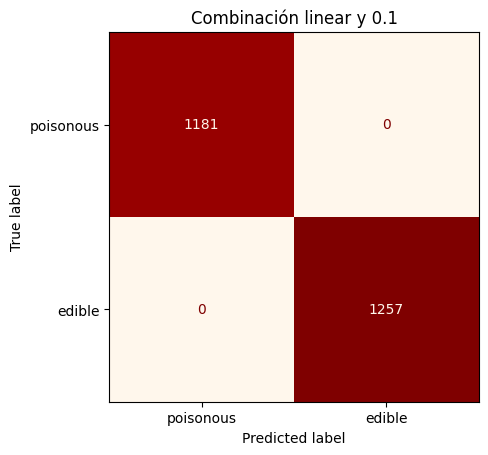

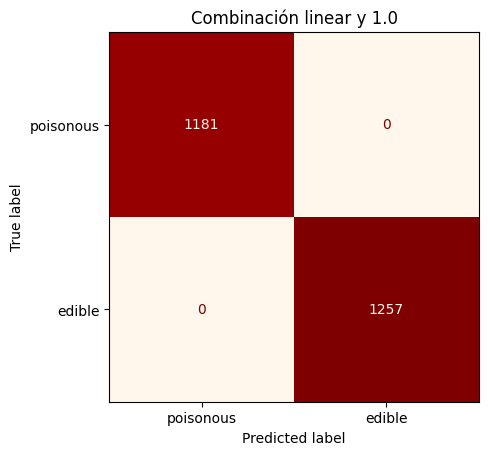

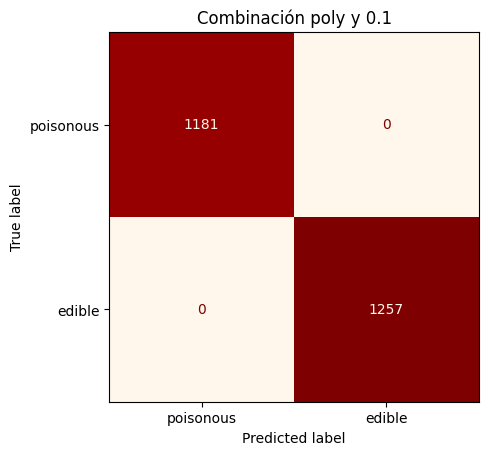

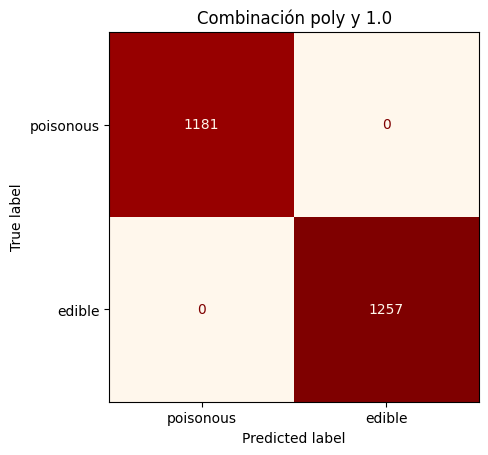

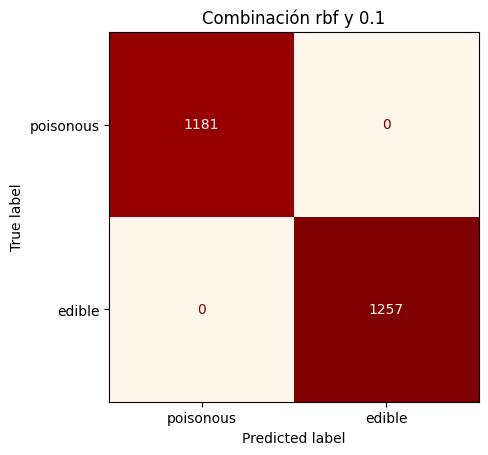

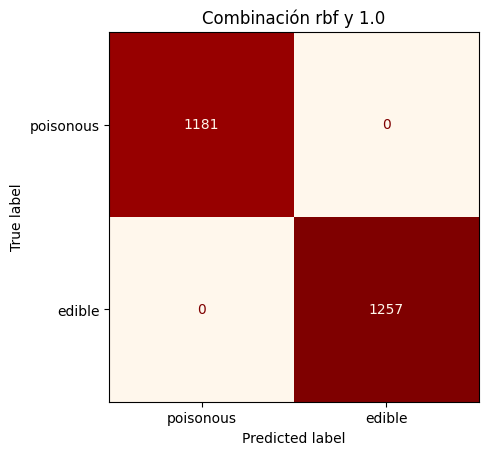

In [97]:
r = []
for _, row in svm_df.iterrows():
  ConfusionMatrixDisplay.from_predictions(y_test,
                                          row['y_pred'],
                                          display_labels=['poisonous','edible'],
                                          cmap=plt.cm.OrRd,
                                          colorbar=False)
  plt.title(f"Combinación {row['kernel']} y {row['gamma']}")

Podemos notar que no hay errores de ningún tipo en los modelos.

## 2.3 Conclusiones:

Podemos notar que los modelos de análisis discriminante y de regresión logística dan casi perfectos, además los de support vector machine son perfectos a la hora de predecir el test set por lo que inferimos que los hongos venenosos y comestibles tienden a tener features bastante distintas por lo que al entrenar los modelos, estos obtienen un gran poder de generalización y predictivo, por lo que se obtienen varios modelos con una performance más que satisfactoria.

Finalmente tuviesemos que proponer un modelo nos quedariamos con el modelo de support vector machine con kernel lineal y gamma 1, esto es debido a que no obtuvo errores de ningún tipo y el kernel lineal es el más simple y el gamma no importa debido a que no afecta a este tipo de kernel.